<a href="https://colab.research.google.com/github/anisfreelancer71/kapal_titanic/blob/main/SHOPPING_DATA_PREDIKSI_CUSTOMER_SEGMENTASI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Persiapan Data

In [ ]:
# Mengimpor library yang diperlukan
import numpy as np
import pandas as pd

# Import data ke python
datashopping = pd.read_csv('shopping_data.csv')
datashopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Import data ke python
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [ ]:
# Memproses data yang hilang (missing)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, 2:4])
X[:, 2:4] = imputer.transform(X[:, 2:4])

In [ ]:
# Encoding data kategori dan variabel independen
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()                     # Bisa dihilangkan, baca pembahasan di bawahnya
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])     # Bisa dihilangkan, baca pembahasan di bawahnya
transformer = ColumnTransformer(
        [('Age', OneHotEncoder(), [1])],
        remainder='passthrough')
X = np.array(transformer.fit_transform(X), dtype=np.ndarray)

In [ ]:
# Encode variabel dependen
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#Training dan test set

In [ ]:
# Membagi menjadi training set dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

array([[0.0, 1.0, 0.0, 134.0, 2.0, 73.0],
       [1.0, 0.0, 1.0, 66.0, 25.0, 48.0],
       [1.0, 0.0, 1.0, 26.0, 27.0, 28.0],
       [0.0, 1.0, 0.0, 113.0, 1.0, 64.0],
       [1.0, 0.0, 1.0, 168.0, 18.0, 87.0],
       [1.0, 0.0, 1.0, 63.0, 36.0, 47.0],
       [0.0, 1.0, 0.0, 8.0, 44.0, 19.0],
       [0.0, 1.0, 0.0, 75.0, 8.0, 54.0],
       [1.0, 0.0, 1.0, 118.0, 33.0, 67.0],
       [1.0, 0.0, 1.0, 143.0, 14.0, 76.0],
       [1.0, 0.0, 1.0, 71.0, 29.0, 49.0],
       [1.0, 0.0, 1.0, 124.0, 5.0, 70.0],
       [1.0, 0.0, 1.0, 184.0, 23.0, 99.0],
       [1.0, 0.0, 1.0, 97.0, 9.0, 60.0],
       [0.0, 1.0, 0.0, 149.0, 16.0, 78.0],
       [1.0, 0.0, 1.0, 24.0, 36.0, 28.0],
       [0.0, 1.0, 0.0, 30.0, 42.0, 30.0],
       [1.0, 0.0, 1.0, 160.0, 38.0, 79.0],
       [1.0, 0.0, 1.0, 40.0, 45.0, 38.0],
       [1.0, 0.0, 1.0, 56.0, 33.0, 44.0],
       [0.0, 1.0, 0.0, 131.0, 21.0, 71.0],
       [1.0, 0.0, 1.0, 96.0, 29.0, 60.0],
       [1.0, 0.0, 1.0, 181.0, 14.0, 97.0],
       [1.0, 0.0, 1.0, 19.0, 

In [ ]:
y_train

array([42, 24, 10, 35, 52, 23,  4, 27, 37, 45, 25, 39, 57, 31, 47, 10, 12,
       48, 16, 21, 40, 31, 55,  7, 47, 31, 20, 49, 19, 28, 43, 30, 42, 33,
       46, 29, 34,  5, 10, 44, 58, 18, 43, 61, 34, 23,  1, 22, 42, 62, 17,
        4, 61, 26, 62, 54, 53, 40, 31, 35, 47, 59, 19,  0, 31, 34, 31, 24,
       51, 16, 24, 18, 18, 27,  5, 48,  9, 58, 42,  8,  5, 27, 33, 20, 33,
       27,  1, 36, 50, 63,  3, 24, 27, 37, 47, 52, 47, 30, 63,  4, 37, 33,
       13, 21, 24,  0, 37, 49, 17, 33, 41, 52,  6, 15, 41, 20, 47, 40, 13,
       11, 36, 47, 12, 51, 40, 53, 13, 45, 52, 46, 11, 32, 27, 27, 36, 47,
       60, 26, 27, 10, 50, 27, 59, 53, 59, 15, 22, 44, 29, 25, 28, 14,  8,
        4, 33, 24, 60, 36, 18, 52])

In [ ]:
X_test

array([[0.0, 1.0, 0.0, 18.0, 34.0, 23.0],
       [0.0, 1.0, 0.0, 170.0, 22.0, 87.0],
       [0.0, 1.0, 0.0, 107.0, 36.0, 63.0],
       [0.0, 1.0, 0.0, 98.0, 30.0, 61.0],
       [0.0, 1.0, 0.0, 177.0, 9.0, 88.0],
       [0.0, 1.0, 0.0, 182.0, 28.0, 98.0],
       [1.0, 0.0, 1.0, 5.0, 4.0, 17.0],
       [0.0, 1.0, 0.0, 146.0, 30.0, 77.0],
       [1.0, 0.0, 1.0, 12.0, 40.0, 20.0],
       [1.0, 0.0, 1.0, 152.0, 26.0, 78.0],
       [0.0, 1.0, 0.0, 61.0, 1.0, 46.0],
       [1.0, 0.0, 1.0, 125.0, 13.0, 70.0],
       [1.0, 0.0, 1.0, 180.0, 19.0, 97.0],
       [1.0, 0.0, 1.0, 154.0, 29.0, 78.0],
       [0.0, 1.0, 0.0, 80.0, 39.0, 54.0],
       [1.0, 0.0, 1.0, 7.0, 5.0, 18.0],
       [0.0, 1.0, 0.0, 33.0, 0.0, 33.0],
       [0.0, 1.0, 0.0, 130.0, 29.0, 71.0],
       [1.0, 0.0, 1.0, 37.0, 12.0, 34.0],
       [0.0, 1.0, 0.0, 74.0, 41.0, 54.0],
       [1.0, 0.0, 1.0, 183.0, 11.0, 98.0],
       [0.0, 1.0, 0.0, 145.0, 10.0, 77.0],
       [1.0, 0.0, 1.0, 45.0, 6.0, 39.0],
       [1.0, 0.0, 1.0, 159.0, 

In [ ]:
y_test

array([ 7, 52, 34, 32, 53, 56,  2, 46,  5, 47, 22, 39, 55, 47, 27,  3, 13,
       40, 14, 27, 56, 46, 17, 47, 22, 38, 54, 57, 38, 17,  6, 20, 47, 34,
        9, 59, 40,  2, 27, 34])

#Feature scaling

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Regression

In [43]:
# Fitting Simple Linear Regression terhadap Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
# Memprediksi hasil Test Set
y_pred = regressor.predict(X_test)

In [39]:
datashopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


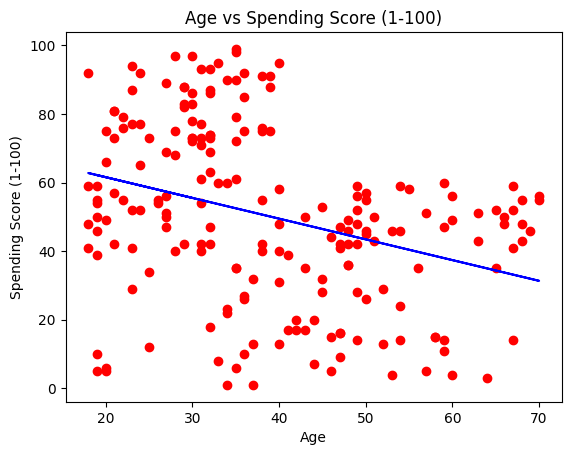

In [47]:
# Impor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression  # Misalnya, mengimpor model regresi linear

# Import data ke python
datashopping = pd.read_csv('shopping_data.csv')

# Misalnya, menetapkan kolom Age sebagai X_train dan kolom Spending Score sebagai y_train
X_train = datashopping['Age'].values.reshape(-1, 1)
y_train = datashopping['Spending Score (1-100)'].values

# Membuat model regresi linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Visualisasi hasil Training Set
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Age vs Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [52]:
# Impor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression  # Misalnya, mengimpor model regresi linear

# Import data pelatihan ke dalam Python
datacustomer = pd.read_csv('df-customer-segmentation.csv')
datacustomer.head()


,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


In [53]:
# Impor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression  # Misalnya, mengimpor model regresi linear

# Import data pelatihan ke dalam Python
datacustomer = pd.read_csv('shopping_data.csv')
datacustomer.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


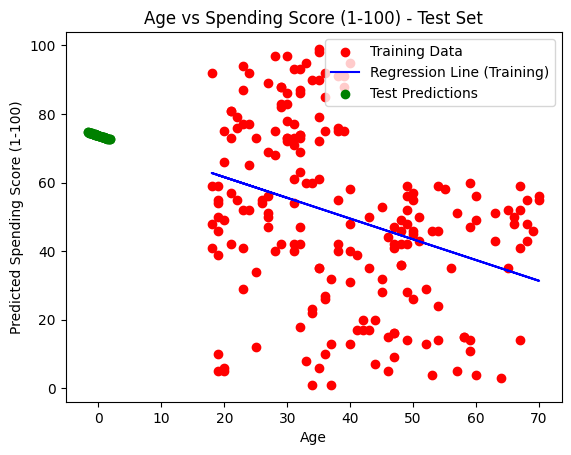

In [55]:
# Impor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression  # Misalnya, mengimpor model regresi linear

# Import data pelatihan ke dalam Python
datashopping = pd.read_csv('shopping_data.csv')

# Misalnya, menetapkan kolom Age sebagai X_train dan kolom Spending Score sebagai y_train
X_train = datashopping['Age'].values.reshape(-1, 1)
y_train = datashopping['Spending Score (1-100)'].values

# Membuat model regresi linear dan melatihnya
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Import data uji dari file CSV lain
data_uji = pd.read_csv('df-customer-segmentation.csv')  # Ganti 'data_uji.csv' dengan nama file yang sesuai
X_test = data_uji['Umur'].values.reshape(-1, 1)  # Menggunakan kolom Age untuk data uji

# Menggunakan model yang telah dilatih untuk melakukan prediksi pada data uji
y_test_pred = regressor.predict(X_test)

# Visualisasi hasil Training Set
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression Line (Training)')
plt.title('Age vs Spending Score (1-100) - Training Set')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Visualisasi hasil Test Set
plt.scatter(X_test, y_test_pred, color='green', label='Test Predictions')
plt.title('Age vs Spending Score (1-100) - Test Set')
plt.xlabel('Age')
plt.ylabel('Predicted Spending Score (1-100)')
plt.legend()

plt.show()
